In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import scipy.stats as st
import arviz as az
import scipy.stats as st

1. Study Section 6.4.2 and reproduce Fig. 6.5 in Python.  Follow the same method we used in week 2 using 1000 intervals for $\theta$

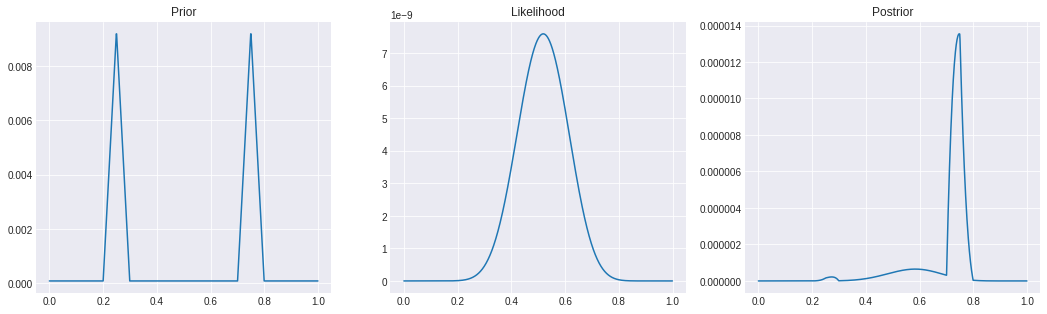

In [2]:
theta = np.arange (0.0,1.0000,0.001)

pTheta = np.concatenate ( (np.ones(200), np.linspace (1, 100, 50), 
                           np.linspace (100,1, 50), np.ones (400), 
                           np.linspace (1, 100, 50), np.linspace (100,1, 50), 
                           np.ones (200) ))

pTheta = pTheta/sum(pTheta)  # Make pTheta sum to 1.0. Normalize

data = np.concatenate([np.zeros(13), np.ones(14)])


def likelihood(z, N, θ):
    return (θ**z) * ((1-θ)**(N-z)) 

# Equation 5.8   
def normalization_const_n (z, N): 
    return np.sum(np.multiply (likelihood (z,N,theta), theta))

# Equation 5.7
def posterior_n (z,N):
    denominator = normalization_const_n (z, N)
    numerator = np.multiply(likelihood (z, N, theta), pTheta)
    return numerator / denominator 

plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots(1,3, figsize=(18,5))
ax[0].set_title("Prior")
ax[0].plot(theta, pTheta)


ax[1].set_title("Likelihood")
ax[1].plot(theta, likelihood(14,27,theta))

x = np.arange (0.0,1.0,0.001)

ax[2].set_title("Postrior")
ax[2].plot(x,posterior_n(14,24))

plt.show()



**Exercise 6.1**

Exercise 6.1. [Purpose: For you to see the influence of the prior in each
successive flip, and for you to see another demonstration that the posterior is invariant under re-orderings of the data.] For this exercise, use the R function
explained in Section 6.6 ( BernBeta.R ). (Don’t forget to source the function before
calling it.) Notice that the function returns the posterior beta values each time it is
called, so you can use the returned values as the prior values for the next function call.

(A) Start with a prior distribution that expresses some uncertainty that a coin is
fair: beta(θ|4, 4). Flip the coin once; suppose we get a head. What is the posterior
distribution?

(B) Use the posterior from the previous flip as the prior for the next flip. Suppose
we flip again and get a head. Now what is the new posterior? (Hint: If you type
post = BernBeta( c(4,4) , c(1) ) for the first part, then you can type post =
BernBeta( post , c(1) ) for the next part.)

(C) Using that posterior as the prior for the next flip, flip a third time and get a tail.
Now what is the new posterior? (Hint: Type post = BernBeta( post , c(0) ) .)

(D) Do the same three updates but in the order T, H, H instead of H, H, T. Is the
final posterior distribution the same for both orderings of the flip results?

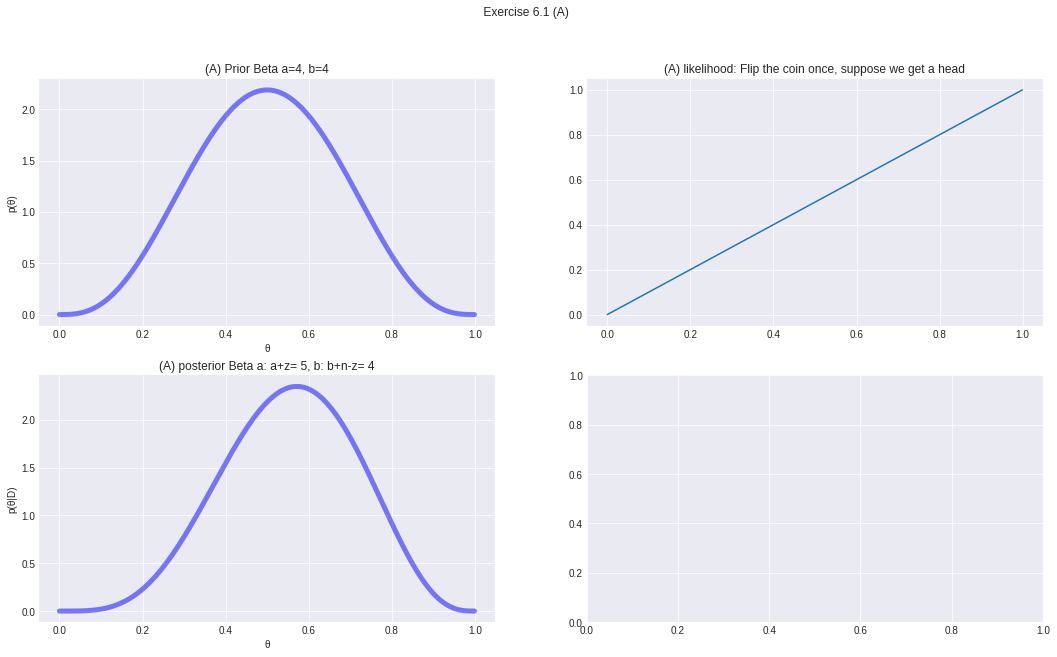

In [3]:
plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots(2, 2, figsize=(18,10))
fig.suptitle(' Exercise 6.1 (A)')
# fig.subplots_adjust(hspace = 0.5) # add some vertical whitespace so that plots do not overlap

a, b = 4, 4

Theta = np.arange(0.000, 1, 0.001)
pTheta = st.beta.stats(a, b, moments='mvsk')

def Likelihood(θ, n, z): return θ**z * (1-θ)**(n-z) # Bernouli/binomial likelihood

# Prior
x = np.arange(0.00, 1.01, 0.01)      
ax[0,0].set_title('(A) Prior Beta a=4, b=4') 
ax[0,0].plot(Theta, st.beta.pdf(Theta, a, b),'b-', lw=5, alpha=0.5, label='beta pdf')
ax[0][0].set_xlabel('θ')
ax[0,0].set_ylabel('p(θ)')

# likelihood
ax[0,1].set_title('(A) likelihood: Flip the coin once, suppose we get a head') 
ax[0,1].plot(Theta, Likelihood(Theta, 1, 1))

n = 1 #we flip coin once 
z = 1 #get a head 
# posterior
ax[1,0].set_title('(A) posterior Beta a: a+z= 5, b: b+n-z= 4') 
ax[1,0].plot(Theta, st.beta.pdf(Theta, a+z, b+n-z),'b-', lw=5, alpha=0.5, label='beta pdf')
ax[1][0].set_xlabel('θ')
ax[1,0].set_ylabel('p(θ|D)');

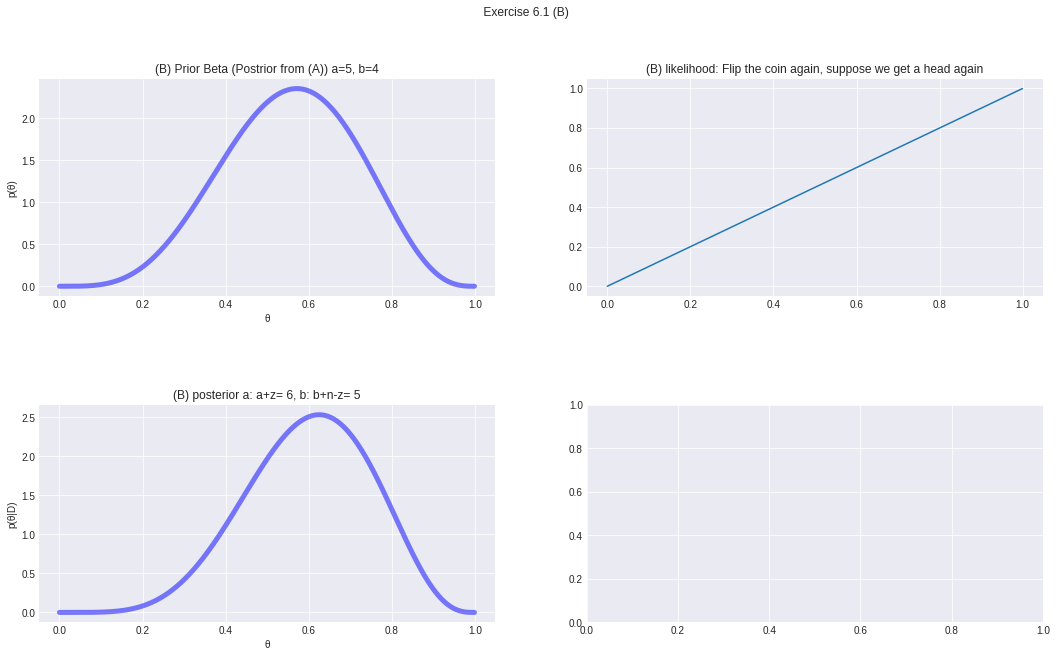

In [4]:
# 6.1 B)

fig, ax = plt.subplots(2, 2, figsize=(18,10))
fig.suptitle(' Exercise 6.1 (B)')
fig.subplots_adjust(hspace = 0.5) 

Theta = np.arange(0.000, 1, 0.001)
a , b = 5, 4

# Prior
ax[0,0].set_title('(B) Prior Beta (Postrior from (A)) a=5, b=4') 
ax[0,0].plot(Theta, st.beta.pdf(Theta, a, b),'b-', lw=5, alpha=0.5, label='beta pdf')
ax[0][0].set_xlabel('θ')
ax[0,0].set_ylabel('p(θ)')


# likelihood
ax[0,1].set_title('(B) likelihood: Flip the coin again, suppose we get a head again') 
ax[0,1].plot(Theta, Likelihood(Theta, 1, 1)) 

n = 1 #we flip again 
z = 1 #get a head again
ax[1,0].set_title('(B) posterior a: a+z= 6, b: b+n-z= 5') 
ax[1,0].plot(Theta, st.beta.pdf(Theta, a+z, b+n-z),'b-', lw=5, alpha=0.5, label='beta pdf')
ax[1,0].set_xlabel('θ')
ax[1,0].set_ylabel('p(θ|D)');

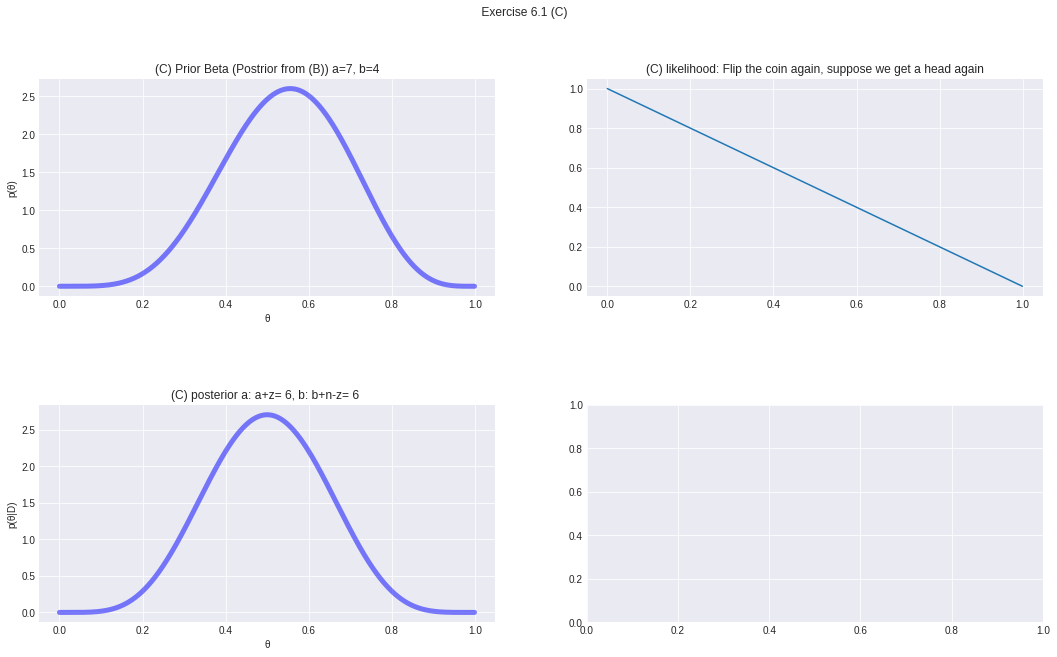

In [5]:
# 6.1 C) 

fig, ax = plt.subplots(2, 2, figsize=(18,10))
fig.suptitle(' Exercise 6.1 (C) ')
fig.subplots_adjust(hspace = 0.5) 

Theta = np.arange(0.000, 1, 0.001)
a , b = 6, 5

# Prior  
ax[0,0].set_title('(C) Prior Beta (Postrior from (B)) a=7, b=4') 
ax[0,0].plot(Theta, st.beta.pdf(Theta, a, b),'b-', lw=5, alpha=0.5, label='beta pdf')
ax[0][0].set_xlabel('θ')
ax[0,0].set_ylabel('p(θ)')


# likelihood
ax[0,1].set_title('(C) likelihood: Flip the coin again, suppose we get a head again') 
ax[0,1].plot(Theta, Likelihood(Theta, 1, 0)) 

n = 1 #we flip again 
z = 0 #get a tail
ax[1,0].set_title('(C) posterior a: a+z= 6, b: b+n-z= 6 ') 
ax[1,0].plot(Theta, st.beta.pdf(Theta, a+z, b+n-z),'b-', lw=5, alpha=0.5, label='beta pdf')
ax[1,0].set_xlabel('θ')
ax[1,0].set_ylabel('p(θ|D)');

6.1 D) Do the same three updates but in the order T, H, H instead of H, H, T. Is the final posterior distribution the same for both orderings of the flip results?

Yes The final posterior is again beta(6,5). There is two H and one T in both case. fliping the coin is independent. The order does not matter

**Exercise 6.2**

(you can plot HDP instead of HDI using pymc3.stats.hpd, or using posterior plots with credible_interval argument as we used in the last two weeks)

 [Purpose: Connecting HDIs to the real world, with iterative data
collection.] Suppose an election is approaching, and you are interested in knowing
whether the general population prefers candidate A or candidate B. There is a just-
published poll in the newspaper, which states that of 100 randomly sampled people, 58
preferred candidate A and the remainder preferred candidate B.

(A) Suppose that before the newspaper poll, your prior belief was a uniform
distribution. What is the 95% HDI on your beliefs after learning of the newspaper poll
results?

(B) You want to conduct a follow-up poll to narrow down your estimate of the
population’s preference. In your follow-up poll, you randomly sample 100 other people
and find that 57 prefer candidate A and the remainder prefer candidate B. Assuming
that peoples’ opinions have not changed between polls, what is the 95% HDI on the
posterior?

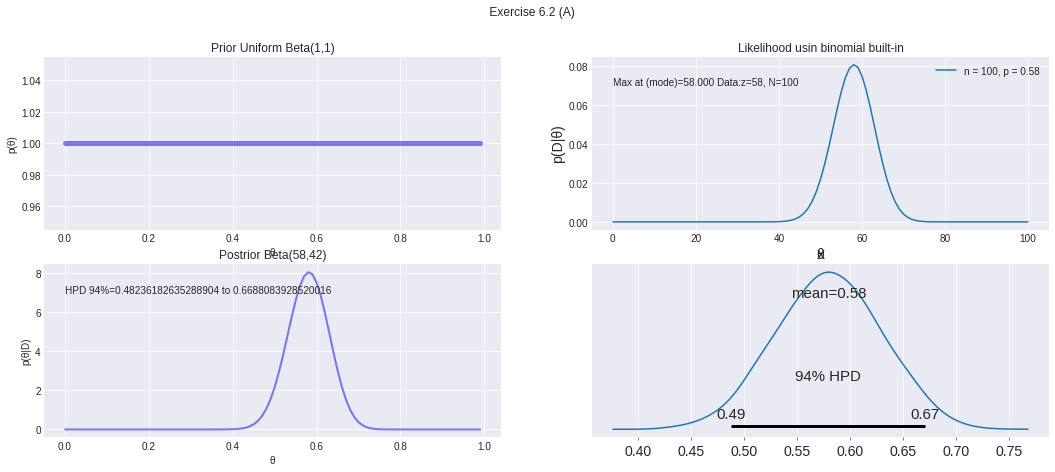

In [6]:
# 6.2 A)
a, b = 1, 1

plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots(2, 2, figsize=(18,7))
fig.suptitle(' Exercise 6.2 (A)')
# fig.subplots_adjust(hspace = 0.8) # add some vertical whitespace so that plots do not overlap


#Uniform Beta Prior
x = np.arange(0.00, 1.0, 0.01)  # 100    
ax[0,0].set_title('Prior Uniform Beta(1,1)') 
ax[0,0].plot(x, st.beta.pdf(x, a, b),'b-', lw=5, alpha=0.5, label='beta pdf')
ax[0][0].set_xlabel('θ')
ax[0,0].set_ylabel('p(θ)')

#Likelihood usin binomial built-in
x = np.arange(0, 101)
z = 58
p = z/100
ns = [100]
ps = [p]

ax[0][1].set_title('Likelihood usin binomial built-in')
for n, p in zip(ns, ps):
    pmf = st.binom.pmf(x, n, p)
    ax[0][1].plot(x, pmf, '-', label='n = {}, p = {}'.format(n, p)) 
    
ax[0,1].set_xlabel('θ', fontsize=14)
ax[0][1].set_ylabel('p(D|θ)', fontsize=14)
ax[0,1].text(0.00, 0.07, f"Max at (mode)={(ns[0] * p):0.3f} Data:z={z}, N={100}")
ax[0][1].legend(loc=1)

### Postrior Beta
θ = np.arange(0.00, 1.0, 0.01)  #100    

ax[1,0].set_title('Postrior Beta(58,42)') 
ax[1,0].plot(θ, st.beta.pdf(θ, 58, 42),'b-', lw=2, alpha=0.5, label='beta pdf')
ax[1][0].set_xlabel('θ')
ax[1,0].set_ylabel('p(θ|D)')
     
#HPD
hpd = pm.stats.hpd(np.random.beta(a=58, b=42,size=10000))
ax[1,0].text(0.00, 7, f"HPD 94%={hpd[0]} to {hpd[1]}")

az.plot_posterior(np.random.beta(a=58, b=42,size=10000), ax= ax[1,1])

plt.show()

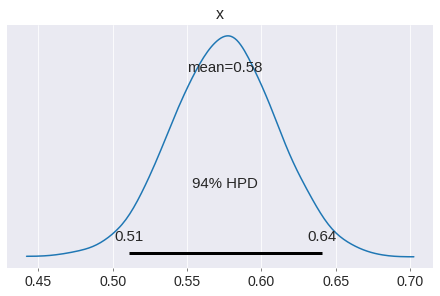

In [7]:
# 6.2 B) 
interval = np.arange(0.40, 0.75, 0.01) 
a = 115
b = 85

az.plot_posterior(np.random.beta(a=115, b=85,size=10000));


**Exercise 6.3**

Exercise 6.3. [Purpose: Apply the Bayesian method to real data analysis. These
data are representative of real data (Kruschke, 2009).] Suppose you train people
in a simple learning experiment, as follows. When people see the two words, “radio” and
“ocean,” on the computer screen, they should press the F key on the computer keyboard.
They see several repetitions and learn the response well. Then you introduce another
correspondence for them to learn: Whenever the words “radio” and “mountain” appear,
they should press the J key on the computer keyboard. You keep training them until they
know both correspondences well. Now you probe what they’ve learned by asking them
about two novel test items. For the first test, you show them the word “radio” by itself
and instruct them to make the best response (F or J) based on what they learned before.
For the second test, you show them the two words “ocean” and “mountain” and ask
them to make the best response. You do this procedure with **50 people**. Your data show
that for “radio” by itself, **40 people chose F and **10 chose J**. For the word combination
“ocean” and “mountain,” **15 chose F and 35 chose J**. Are people biased toward F or
toward J for either of the two probe types? To answer this question, assume a uniform
prior, and use a 95% HDI to decide which biases can be declared to be credible. (Consult
Chapter 12 for how to declare a parameter value to be not credible.)

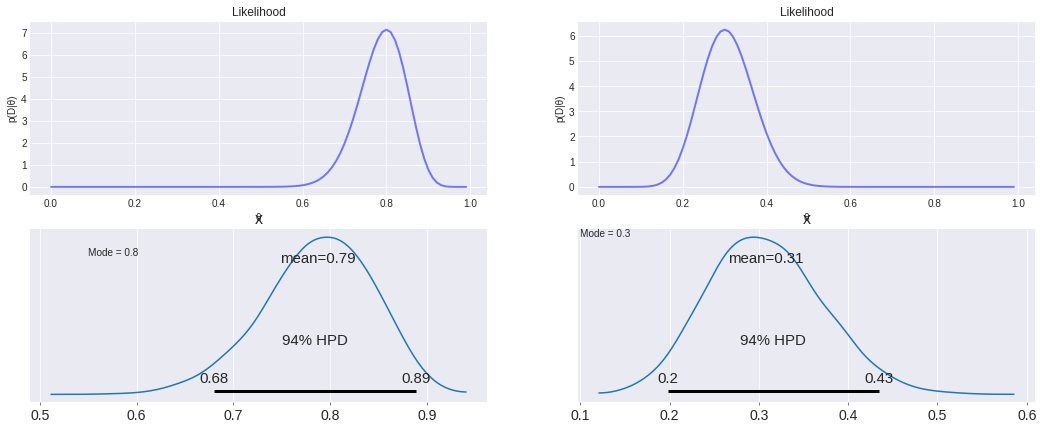

In [8]:
# 6.3

plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots(2, 2, figsize=(18,7))
# fig.subplots_adjust(hspace = 0.8) # add some vertical whitespace so that plots do not overlap

x = np.arange(0.00, 1.00, 0.01) 
a, b= 1, 1

ax[0,0].set_title('Likelihood') 
ax[0,0].plot(x, st.beta.pdf(x, 41, 11),'b-', lw=2, alpha=0.5, label='beta pdf')
ax[0,0].set_xlabel('θ')
ax[0,0].set_ylabel('p(D|θ)')

ax[0,1].set_title('Likelihood') 
ax[0,1].plot(x, st.beta.pdf(x, 16, 36),'b-', lw=2, alpha=0.5, label='beta pdf')
ax[0,1].set_xlabel('θ')
ax[0,1].set_ylabel('p(D|θ)')

az.plot_posterior(np.random.beta(a=41, b=11,size=10000), ax=ax[1,0])
az.plot_posterior(np.random.beta(a=16, b=36,size=10000), ax=ax[1,1])


def mode_from_ab(a,b): 
    if a == b:
        return mu_from_ab(a,b)
    else:
        return (a - 1)/(a + b - 2)
    
m41 = mode_from_ab(41,11)    
ax[1,0].text(.55, 6,f"Mode = {m41}")

m16 = mode_from_ab(16,36)    
ax[1,1].text(0.1, 6,f"Mode = {m16}");


**Exercise 6.4**

[Purpose: To explore an unusual prior and learn about the beta
distribution in the process.] Suppose we have a coin that we know comes from a
magic-trick store, and therefore we believe that the coin is strongly biased either usually
to come up heads or usually to come up tails, but we don’t know which. Express this
belief as a beta prior. (Hint: See Figure 6.1, upper-left panel.) Now we flip the coin
5 times and it comes up heads in 4 of the 5 flips. What is the posterior distribution?
(Use the R function of Section 6.6 ( BernBeta.R ) to see graphs of the prior and
posterior.)

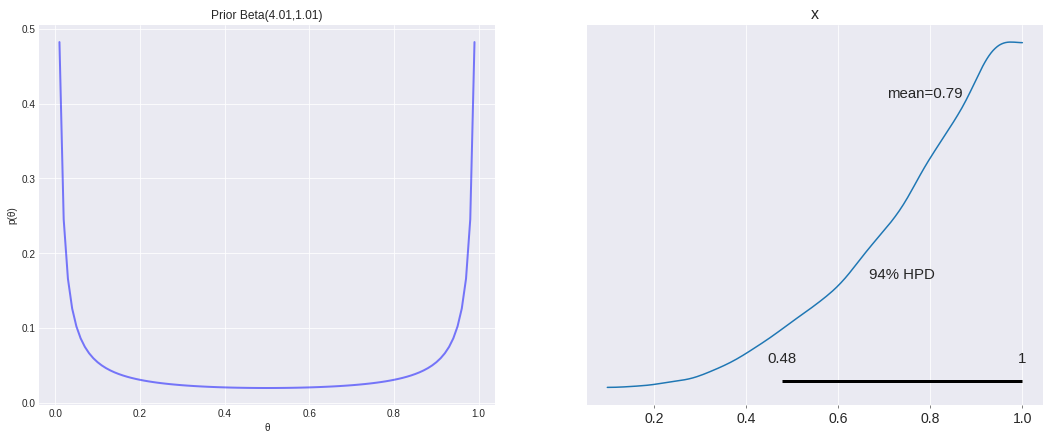

In [9]:
# 6.4
plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots(1, 2, figsize=(18,7))
x = np.arange(0.00, 1.00, 0.01)  
a, b= 0.01, 0.01

ax[0].set_title('Prior Beta(4.01,1.01)') 
ax[0].plot(x, st.beta.pdf(x, 0.01, 0.01),'b-', lw=2, alpha=0.5, label='beta pdf')
ax[0].set_xlabel('θ')
ax[0].set_ylabel('p(θ)')

az.plot_posterior(np.random.beta(a=4.1, b=1.1,size=10000), ax = ax[1]);

**Exercise 6.5** 

[Purpose: To get hands on experience with the goal of predicting
the next datum, and to see how the prior influences that prediction.]

(A) Suppose you have a coin that you know is minted by the government and has
not been tampered with. Therefore you have a strong prior belief that the coin is fair.
You flip the coin 10 times and get 9 heads. What is your predicted probability of heads
for the 11th flip? Explain your answer carefully; justify your choice of prior.

(B) Now you have a different coin, this one made of some strange material and
marked (in fine print) “Patent Pending, International Magic, Inc.” You flip the coin 10
times and get 9 heads. What is your predicted probability of heads for the 11th flip?
Explain your answer carefully; justify your choice of prior. Hint: Use the prior from
Exercise 6.4.

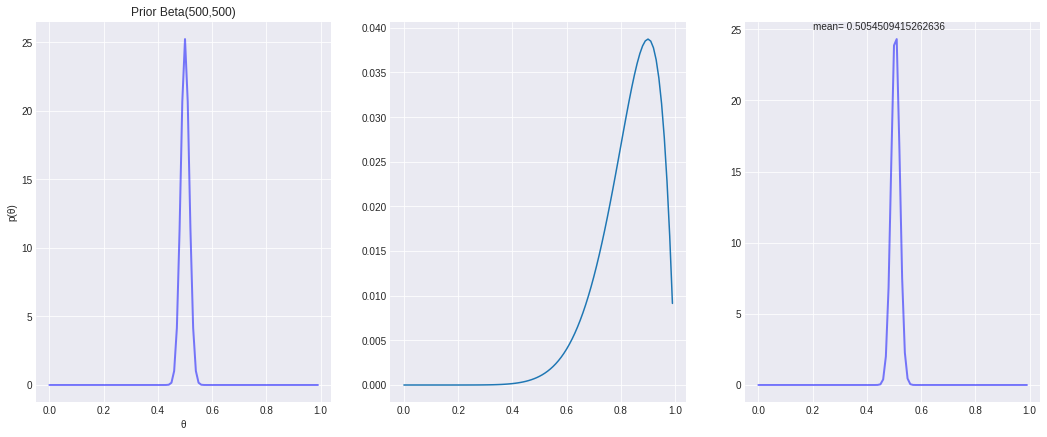

In [10]:
# 6.5 A)
plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots(1, 3, figsize=(18,7))
x = np.arange(0.00, 1.00, 0.01)  # interval
a, b= 500, 500

ax[0].set_title('Prior Beta(500,500)') 
ax[0].plot(x, st.beta.pdf(x, a, b),'b-', lw=2, alpha=0.5, label='beta pdf')
ax[0].set_xlabel('θ')
ax[0].set_ylabel('p(θ)')

def Likelihood(θ, n, z): return θ**z * (1-θ)**(n-z) # Bernouli/binomial likelihood

ax[1].plot(x, Likelihood(x, 10, 9))
ax[2].plot(x, st.beta.pdf(x, a+10, b+9-10),'b-', lw=2, alpha=0.5, label='beta pdf')

def mu_from_ab(a, b): return a / (a+b)
    
ax[2].text(.2, 25, f'mean= {mu_from_ab(a+10, b+9-10)}');


# The predicted probability of heads for the 11th flip is 0.505

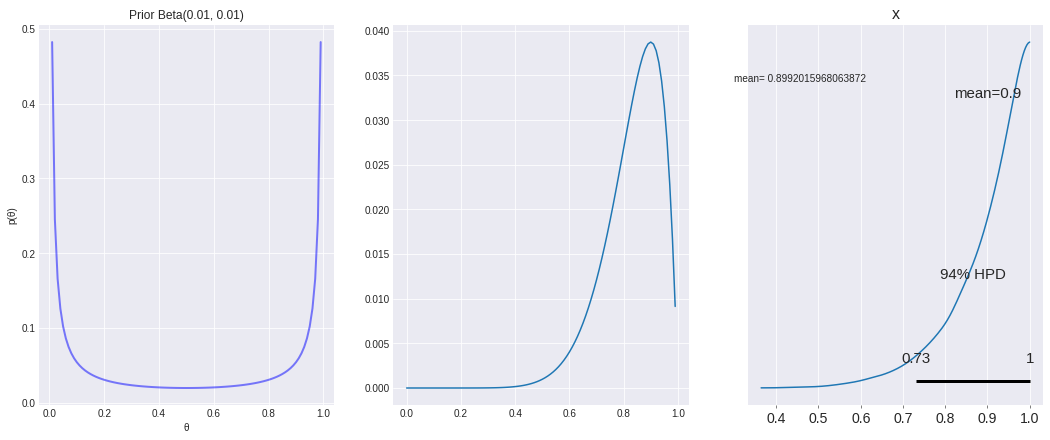

In [11]:
# 6.5 B)
plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots(1, 3, figsize=(18,7))
x = np.arange(0.00, 1.00, 0.01)  # interval
a, b= 0.01, 0.01

ax[0].set_title('Prior Beta(0.01, 0.01)') 
ax[0].plot(x, st.beta.pdf(x, a, b),'b-', lw=2, alpha=0.5, label='beta pdf')
ax[0].set_xlabel('θ')
ax[0].set_ylabel('p(θ)')

def Likelihood(θ, n, z): return θ**z * (1-θ)**(n-z) # Bernouli/binomial likelihood

ax[1].plot(x, Likelihood(x, 10, 9))

az.plot_posterior(np.random.beta(a=9.01, b=1.01,size=10000), ax=ax[2])
ax[2].text(.3, 7, f'mean= {mu_from_ab(9.01, 1.01)}');

# Now the predicted probability of heads for the 11th flip is 0.899